In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [ ]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [ ]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [ ]:
df.set_index("ID", inplace = True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.shape

(3999, 11)

# EDA

In [ ]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [ ]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


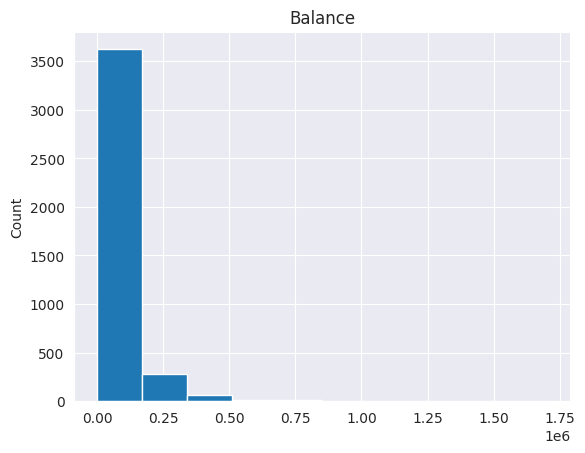

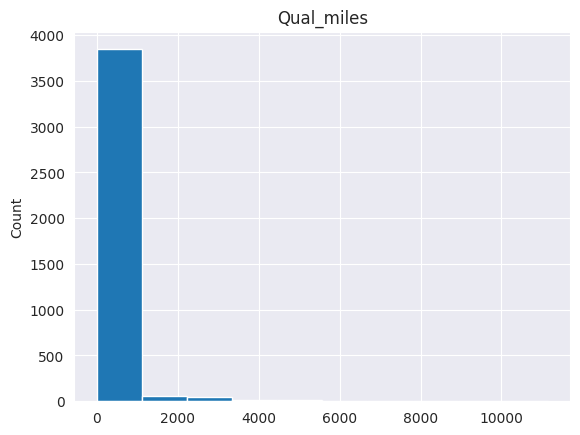

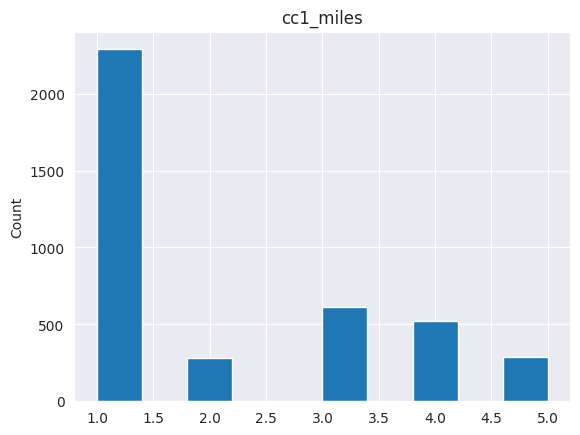

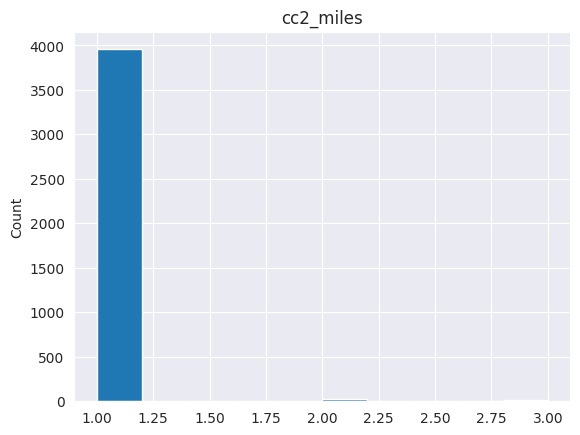

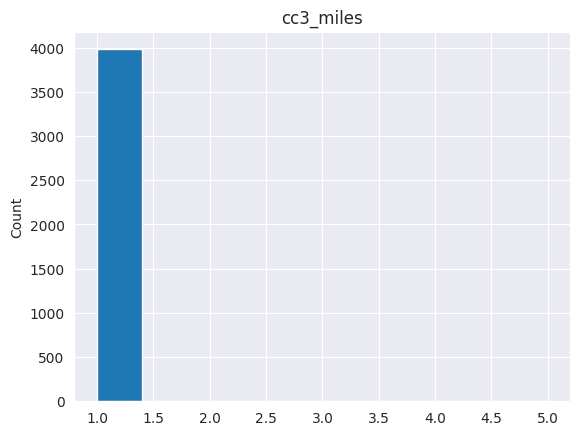

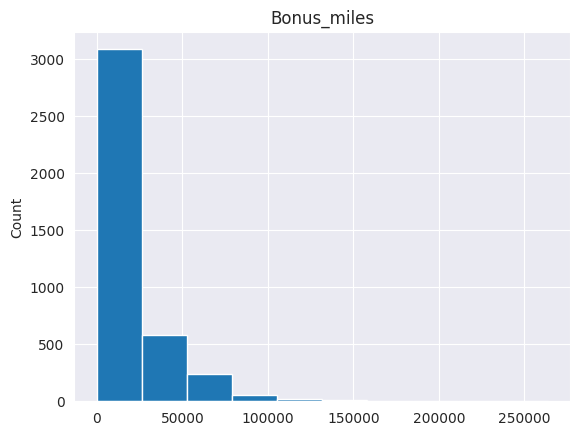

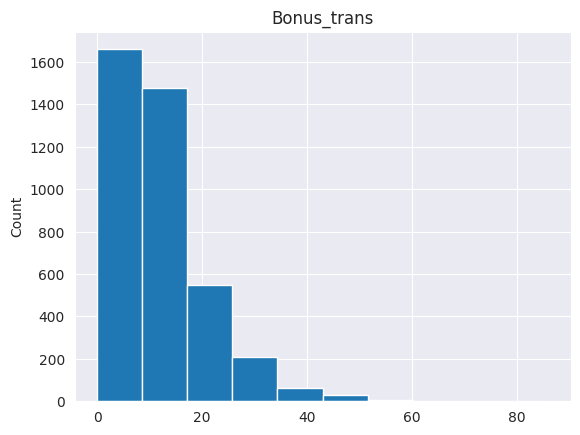

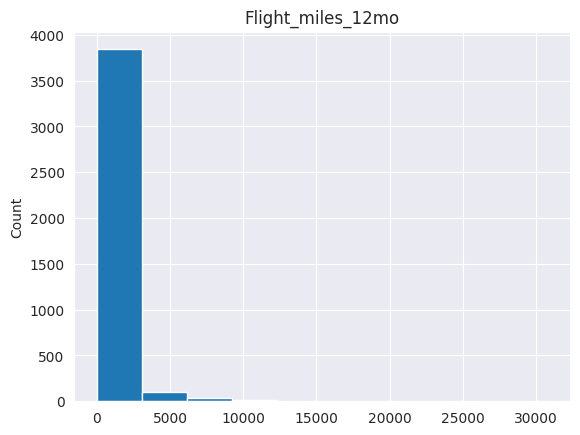

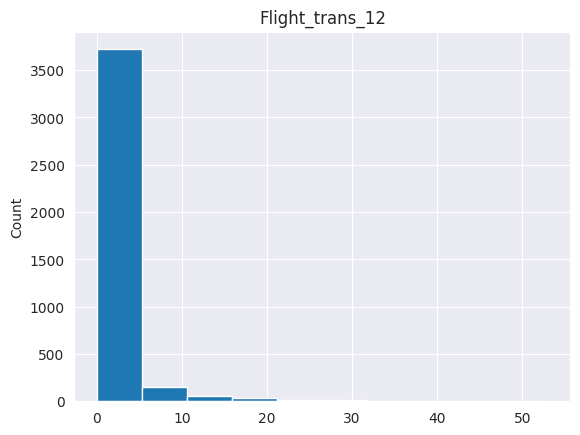

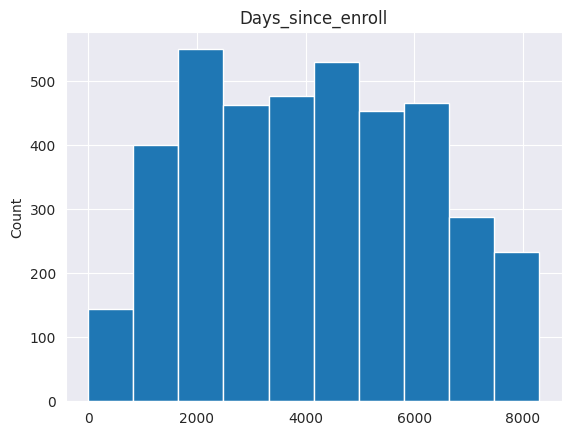

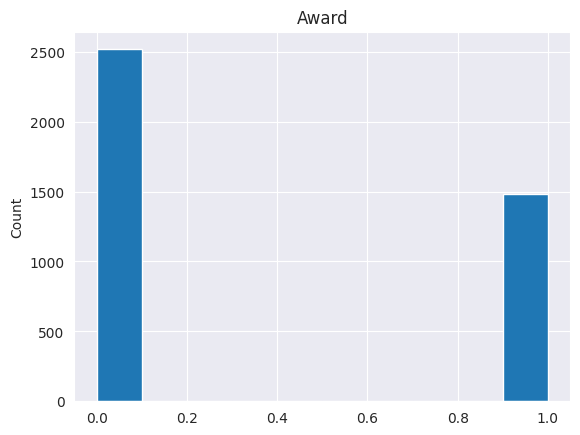

In [ ]:
for feature in df.iloc[:,:]:
    df[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


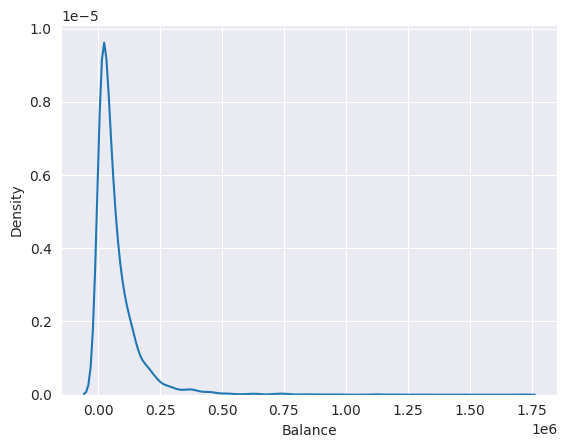

Qual_miles


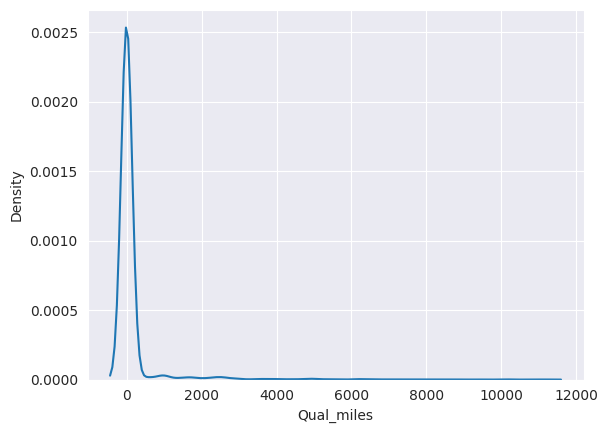

cc1_miles


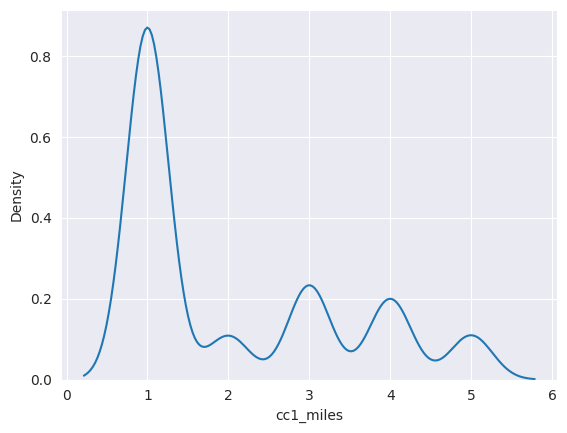

cc2_miles


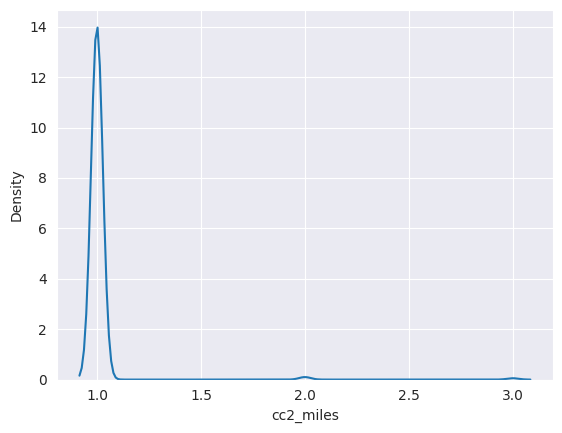

cc3_miles


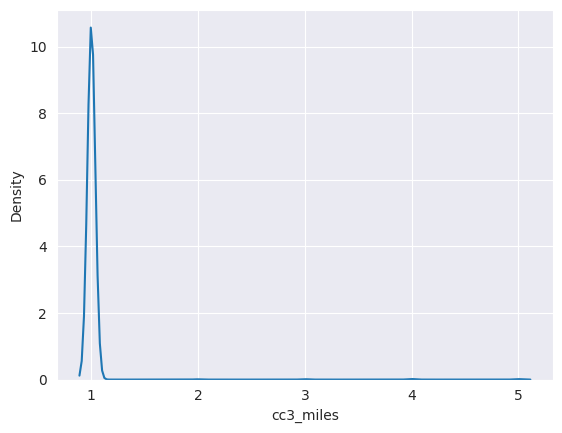

Bonus_miles


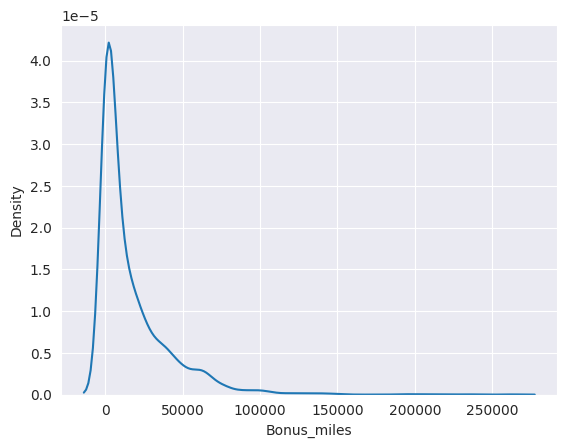

Bonus_trans


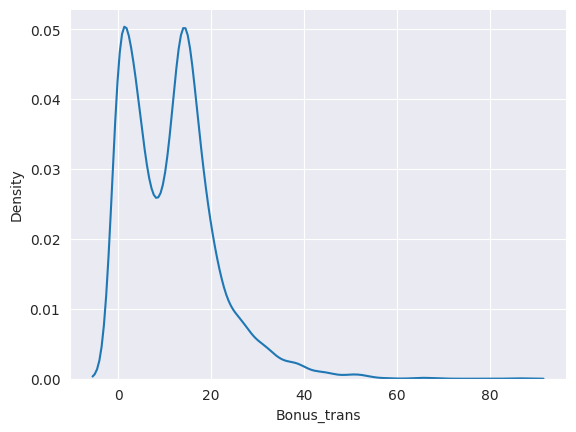

Flight_miles_12mo


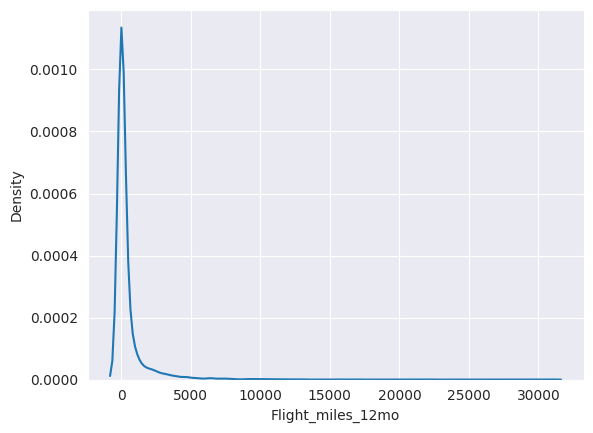

Flight_trans_12


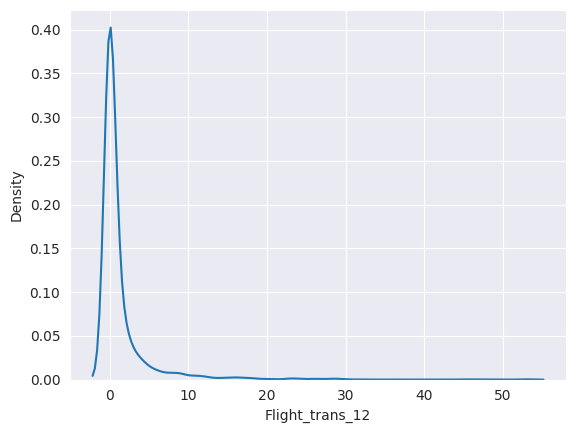

Days_since_enroll


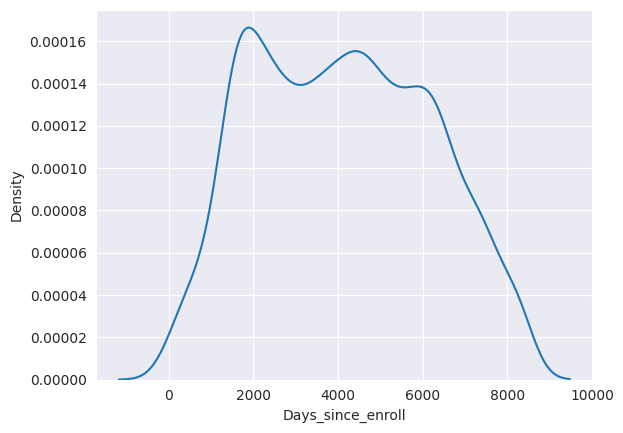

Award


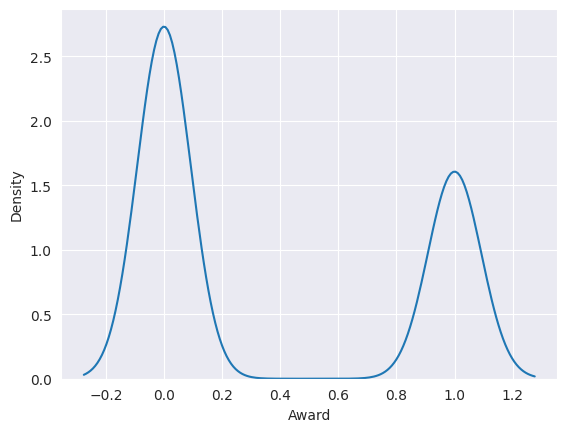

In [ ]:
for n in df.iloc[:,:]:
    print(n)
    sb.kdeplot(df[n])
    plt.show()

# Outlier Detection

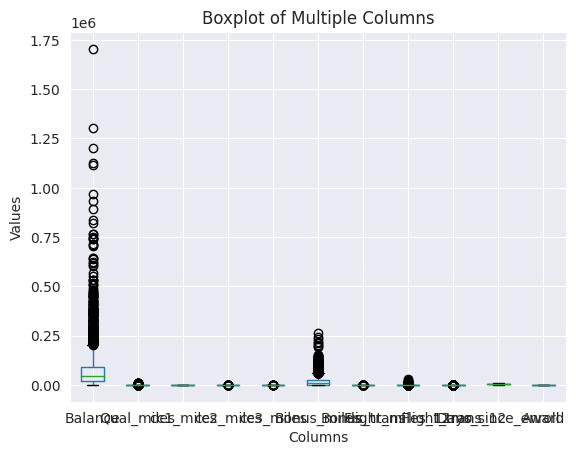

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 10 columns
# You want to plot columns 1 to 10
columns_to_plot = list(df.columns)

# Create boxplot
df.boxplot(column=columns_to_plot)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Multiple Columns')
plt.xticks(rotation=0)
plt.show()


<Figure size 1500x800 with 0 Axes>

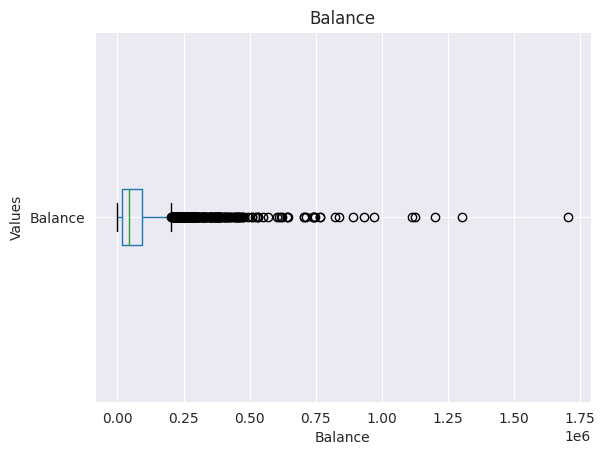

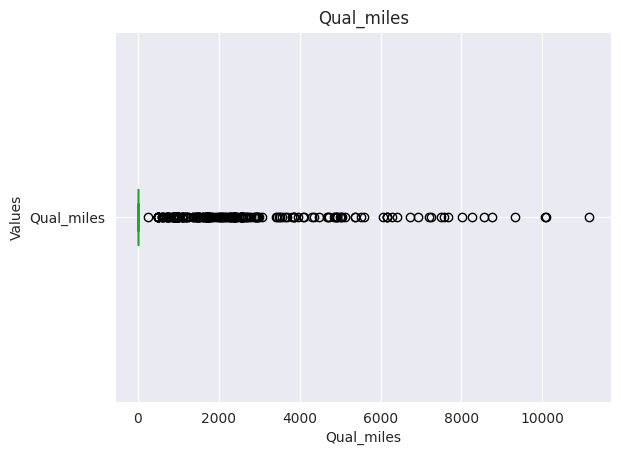

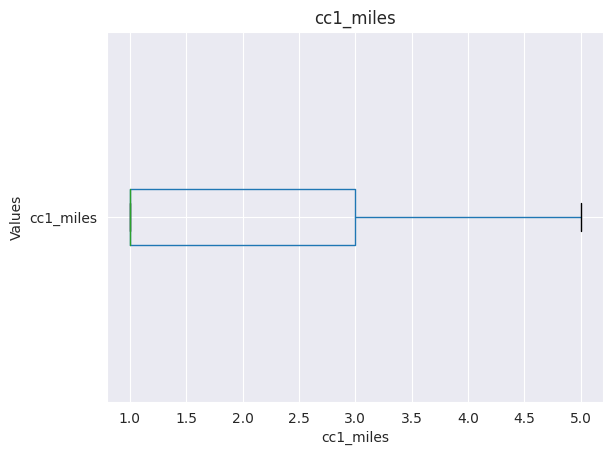

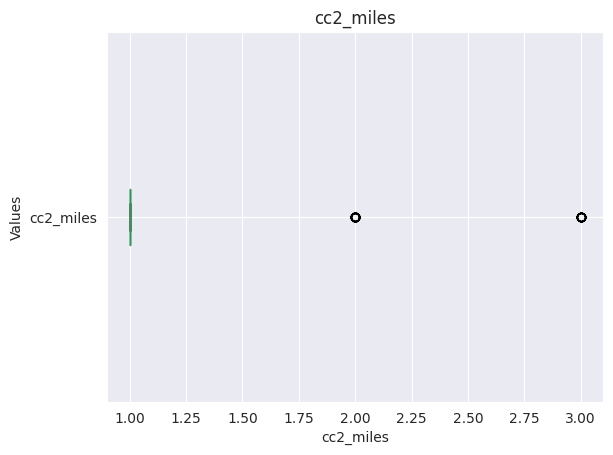

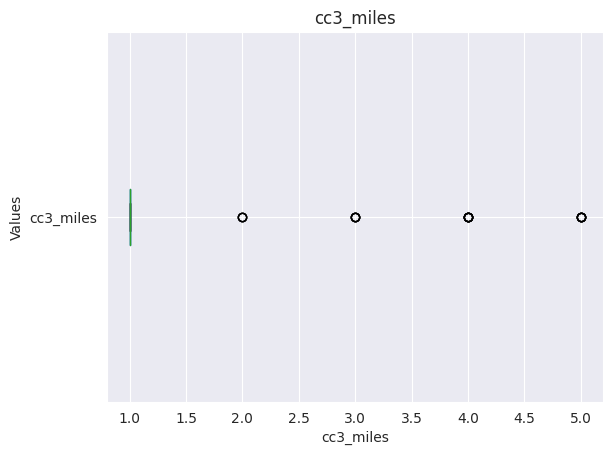

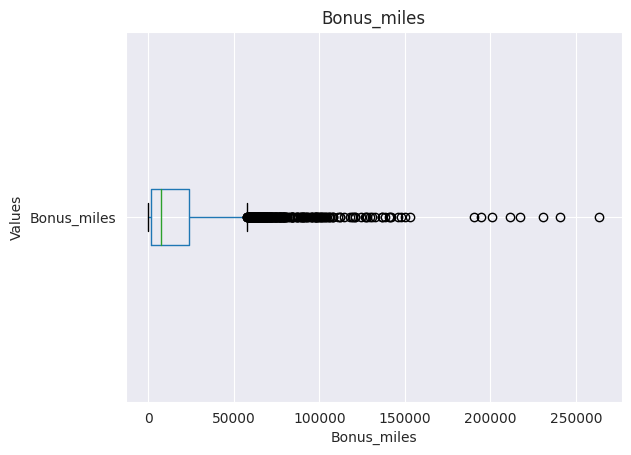

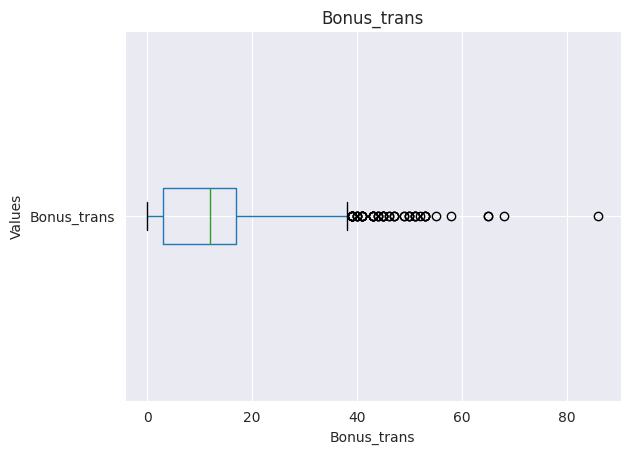

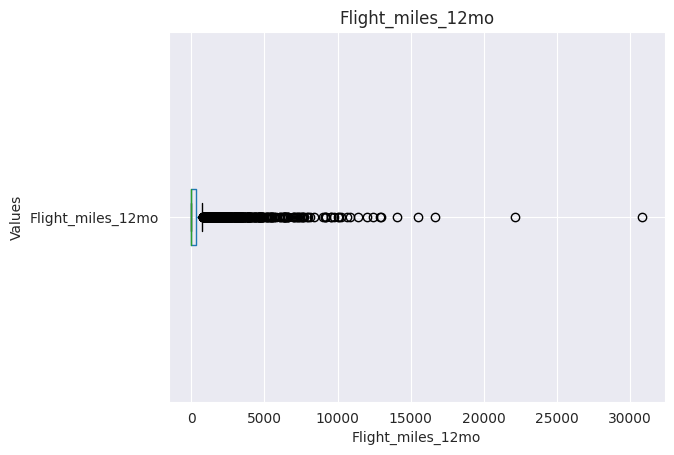

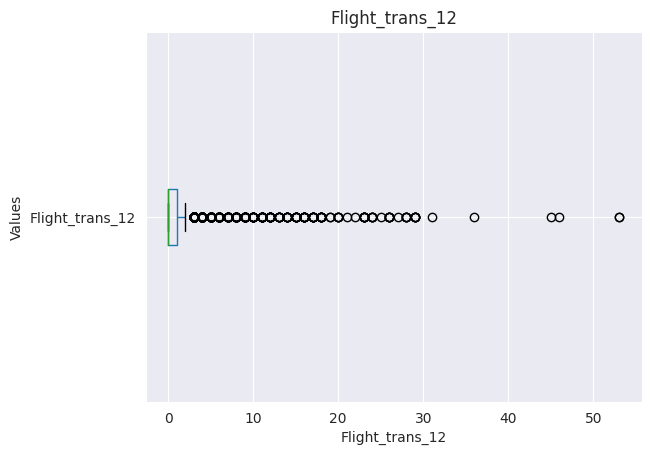

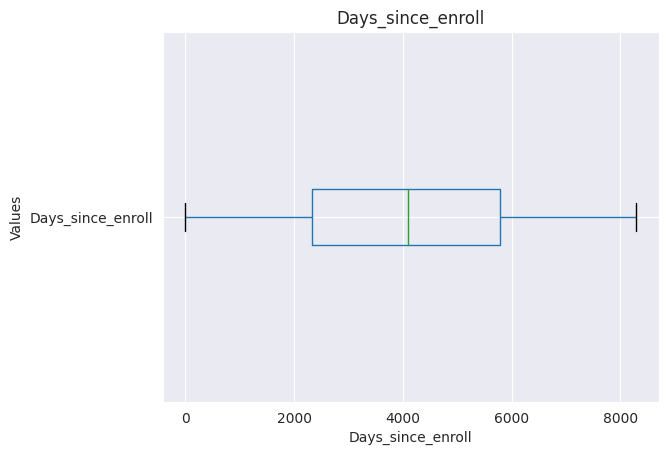

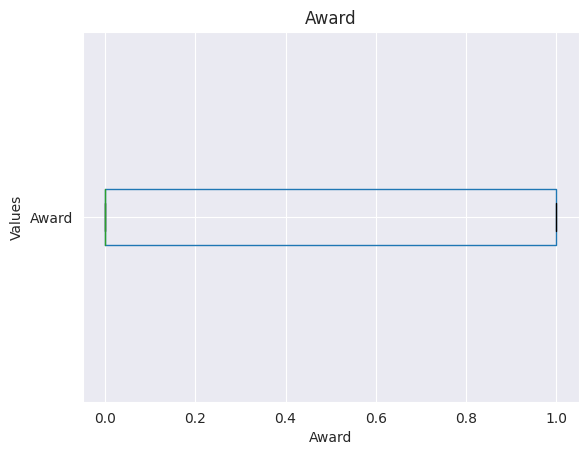

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 10 columns
# You want to plot columns 1 to 10
columns_to_plot = list(df.columns)
plt.figure(figsize = (15, 8))
# Create down boxplot for each column
for col in columns_to_plot:
    plt.figure()
    df.boxplot(column=col, vert = False)
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(col)
    plt.show()


# **Data Visualization**

Text(0.5, 1.0, 'Whether the client has a Award or not ')

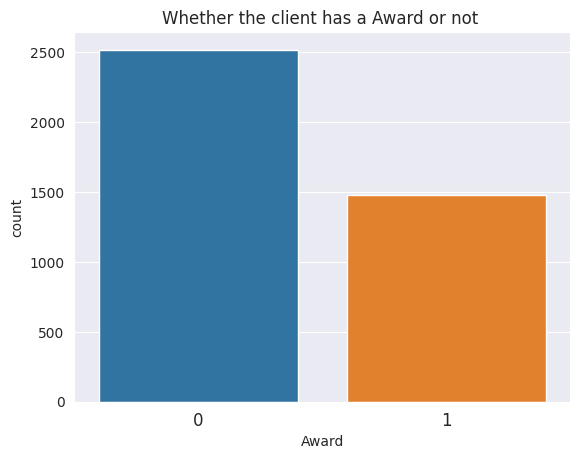

In [ ]:
sb.countplot(x='Award', data=df,
              order=df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

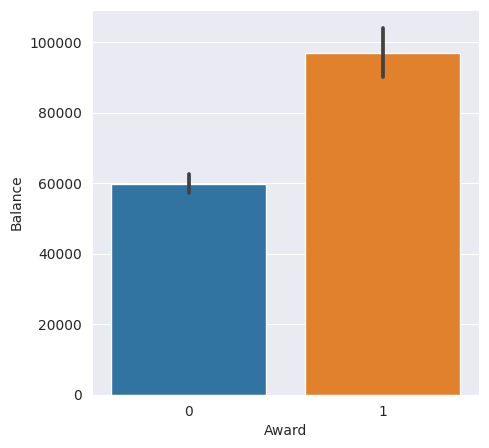

In [ ]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
AB = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sb.barplot(x='Award', y='Balance', data= AB)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=0)
plt.show()

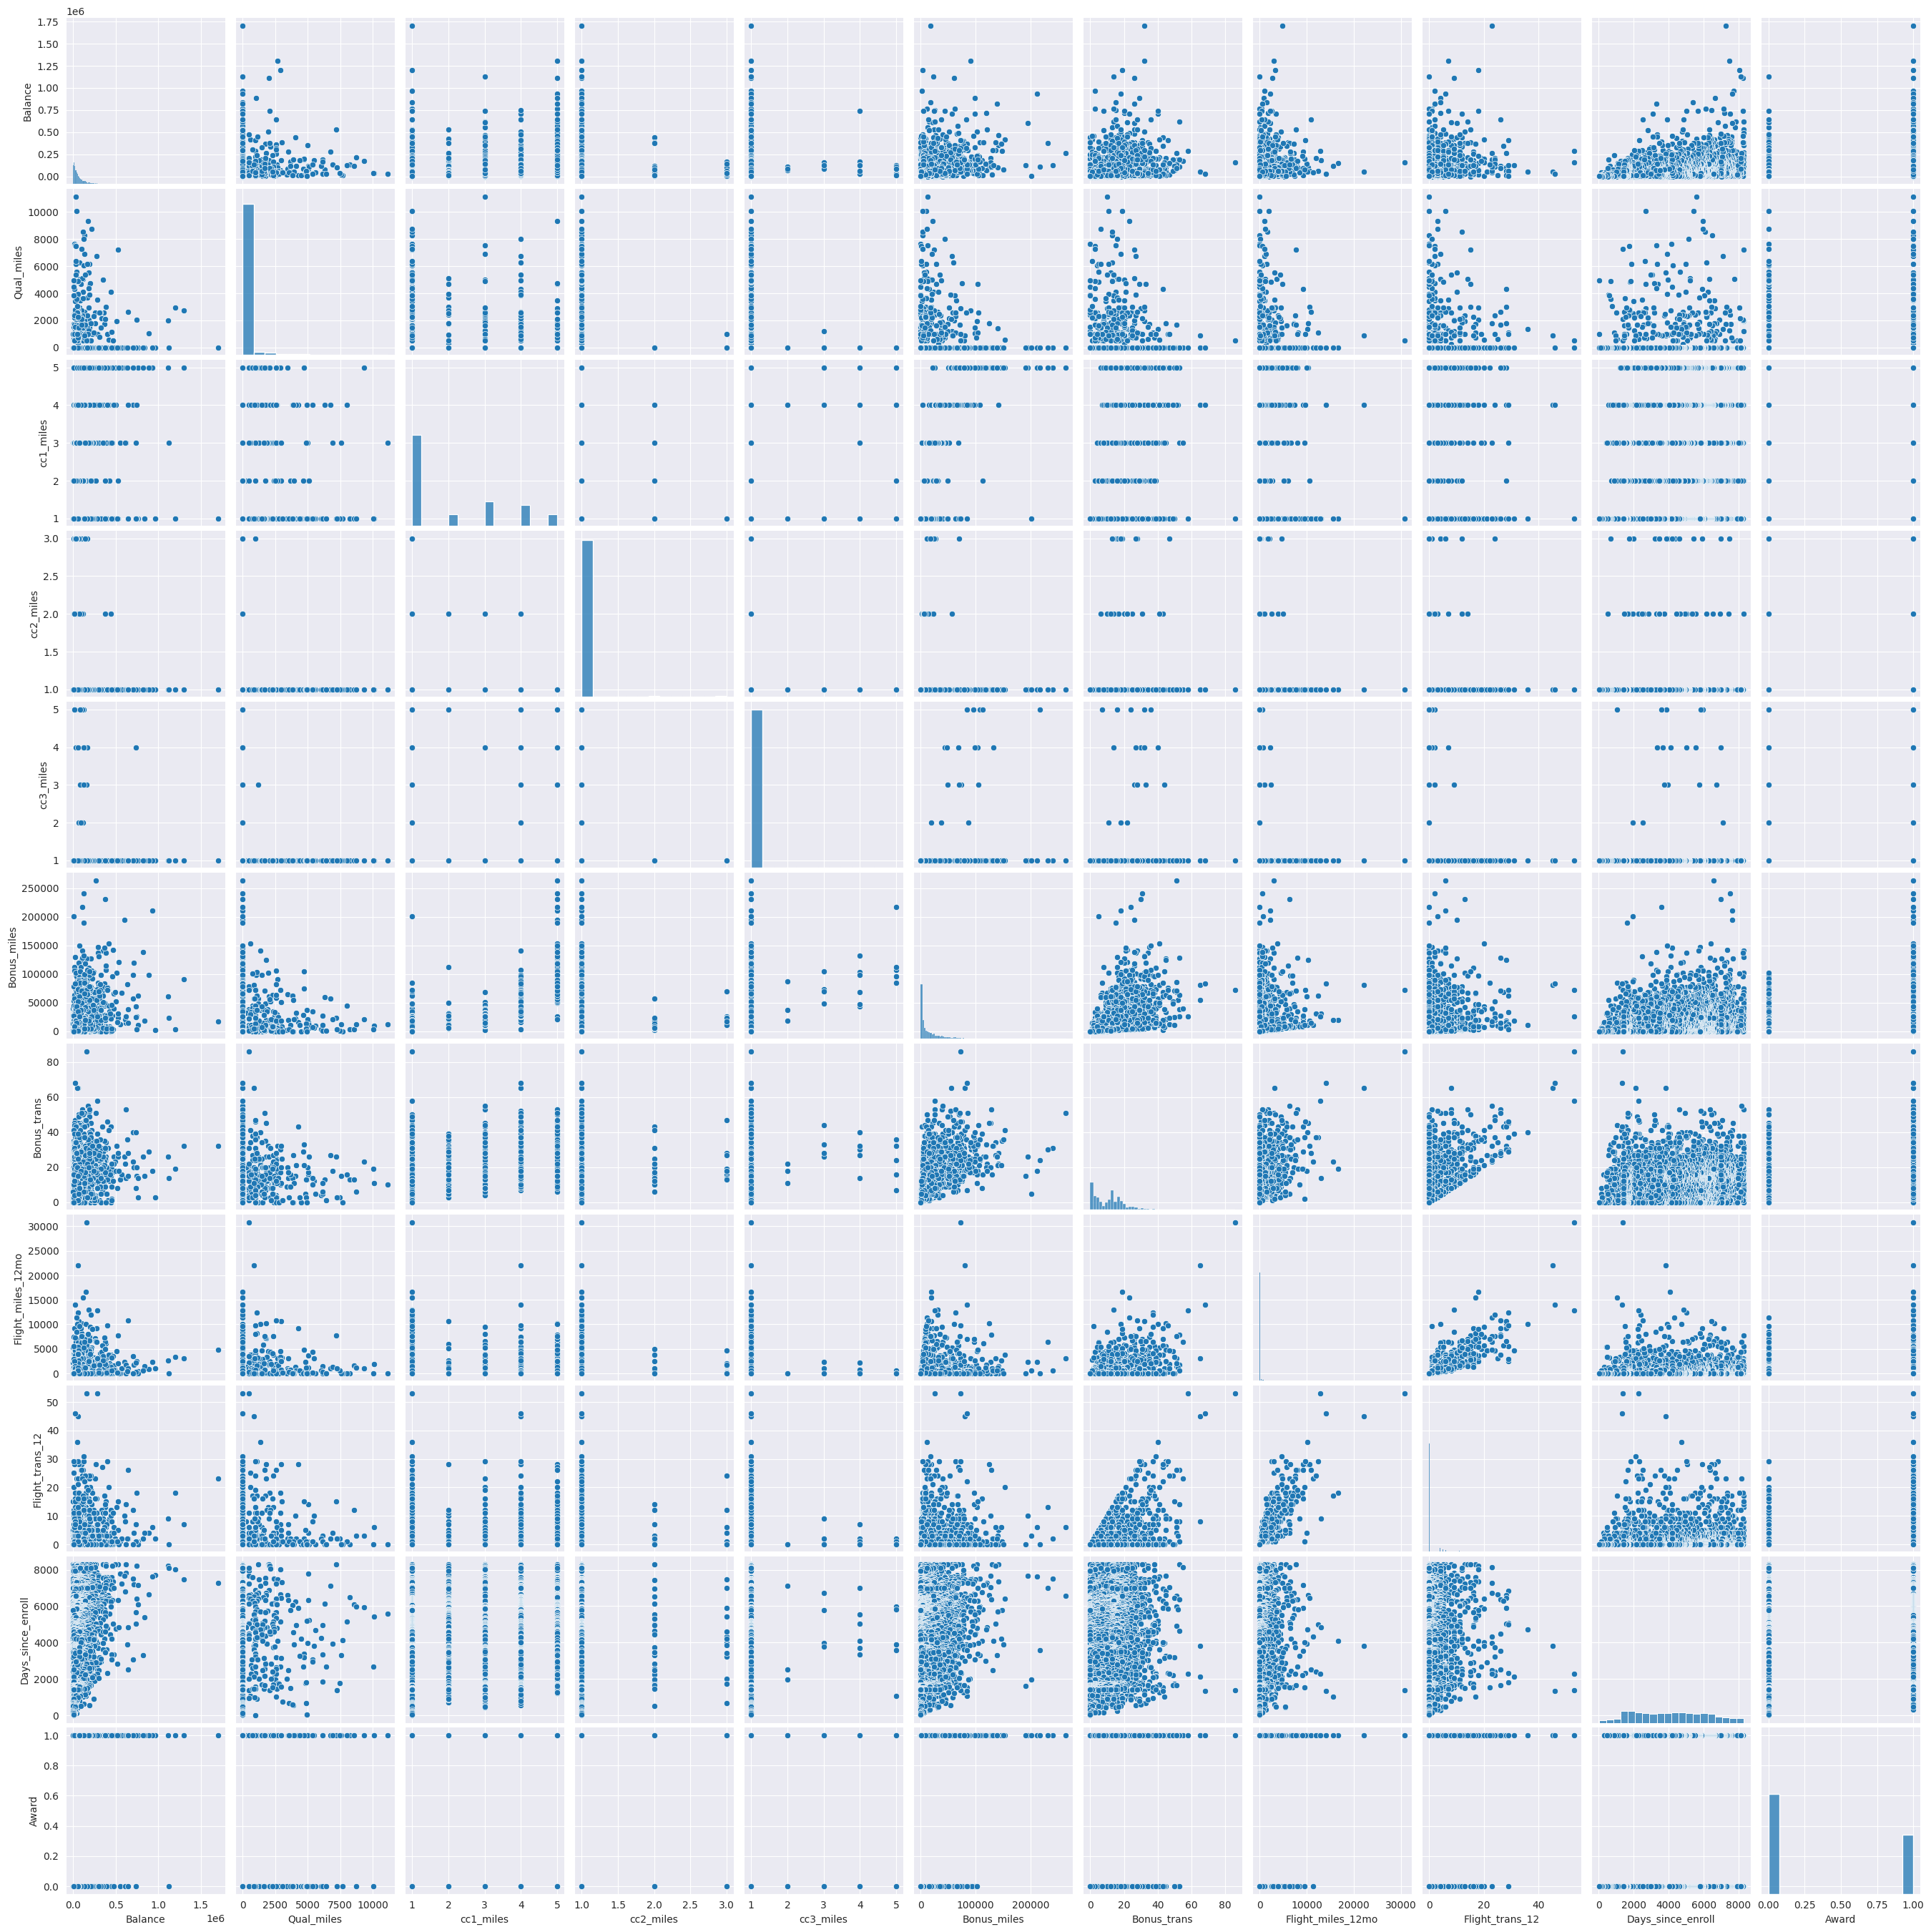

In [ ]:
sb.set_style(style='darkgrid')
sb.pairplot(df)

<Axes: >

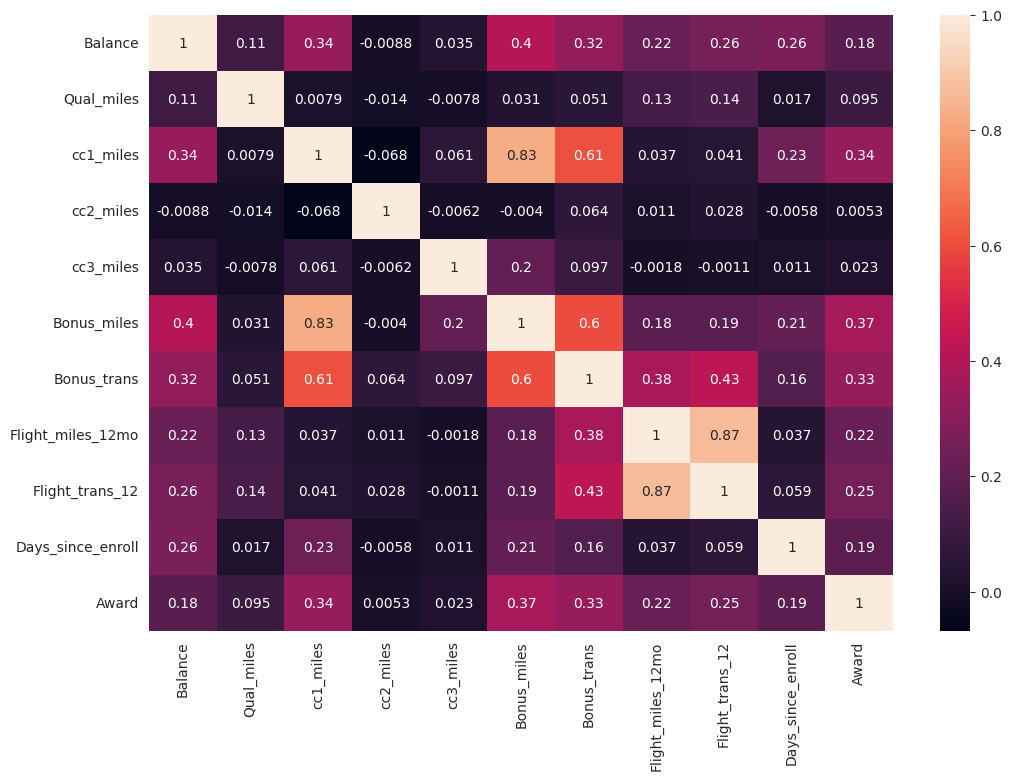

In [ ]:
plt.figure(figsize=(12,8))
sb.heatmap(
    df.corr(),
    annot=True)

# Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
std_df = pd.DataFrame(SS.fit_transform(df))
std_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


# Elbow Method

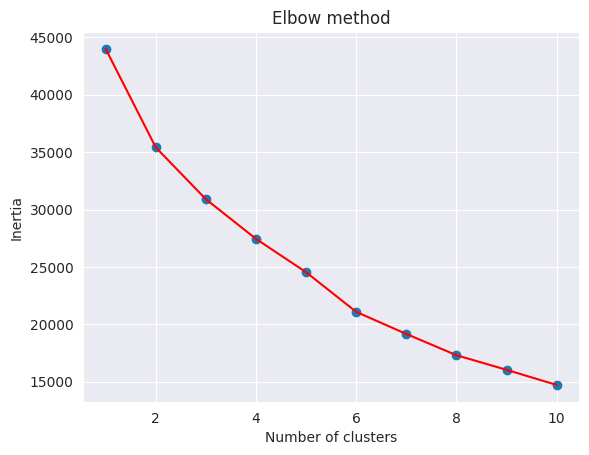

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11) :
    km = KMeans(n_clusters = i, random_state = 0 )
    km.fit(std_df)
    inertia.append(km.inertia_)

plt.scatter(range(1,11), inertia)
plt.plot(range(1,11), inertia, color = 'red')
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.show()


# **K Means Clustering**

In [ ]:
# K-means clustering
from sklearn.cluster import  KMeans
KMeans = KMeans(n_clusters = 6, n_init = 30)
KMeans.fit(std_df)
Y = KMeans.predict(std_df)
Y = pd.DataFrame(Y)
Y

,0
0,1
1,1
2,1
3,1
4,0
...,...
3994,5
3995,5
3996,5
3997,1


In [ ]:
KMeans.inertia_

21470.504354168326

In [ ]:
df1 = df.copy()
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
df1['clust'] = Y
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


In [ ]:
import sklearn
sklearn.metrics.silhouette_score(std_df, Y)

0.2787767697423747

# **Hierarchical Clustering**

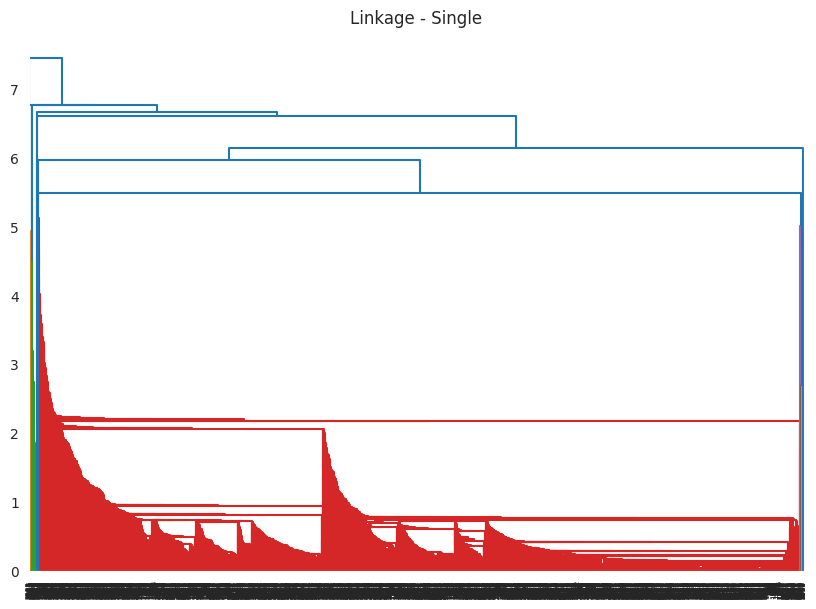

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Single")
dend_S = shc.dendrogram(shc.linkage(std_df, method = "single"))

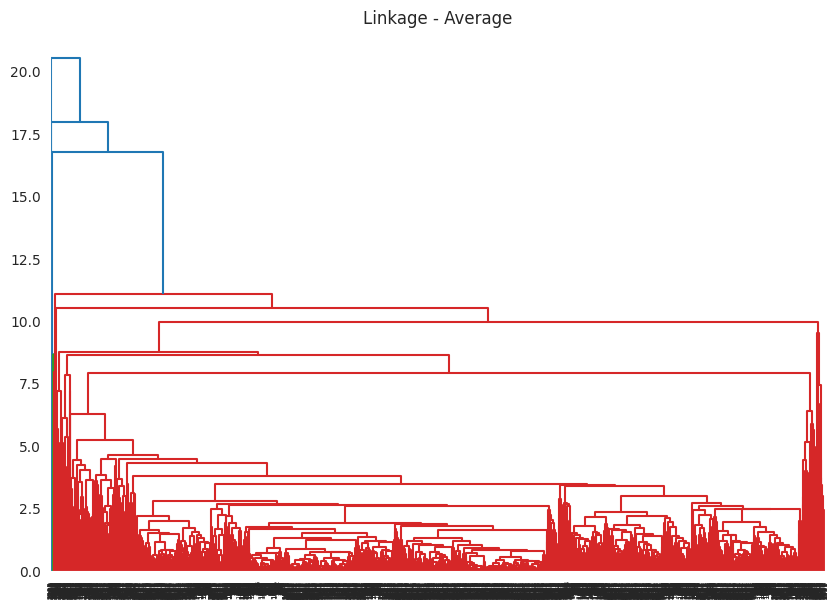

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Average")
dend_A = shc.dendrogram(shc.linkage(std_df, method = "average"))

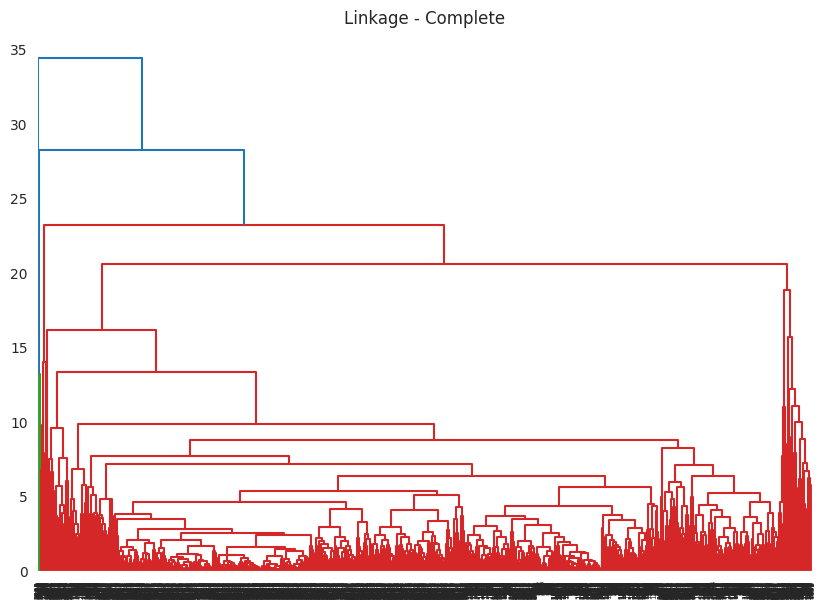

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Complete")
dend_C = shc.dendrogram(shc.linkage(std_df, method = "complete"))

# **DBSCAN**

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 22)
nbrs = neigh.fit(std_df)
distances, indices = nbrs.kneighbors(std_df)

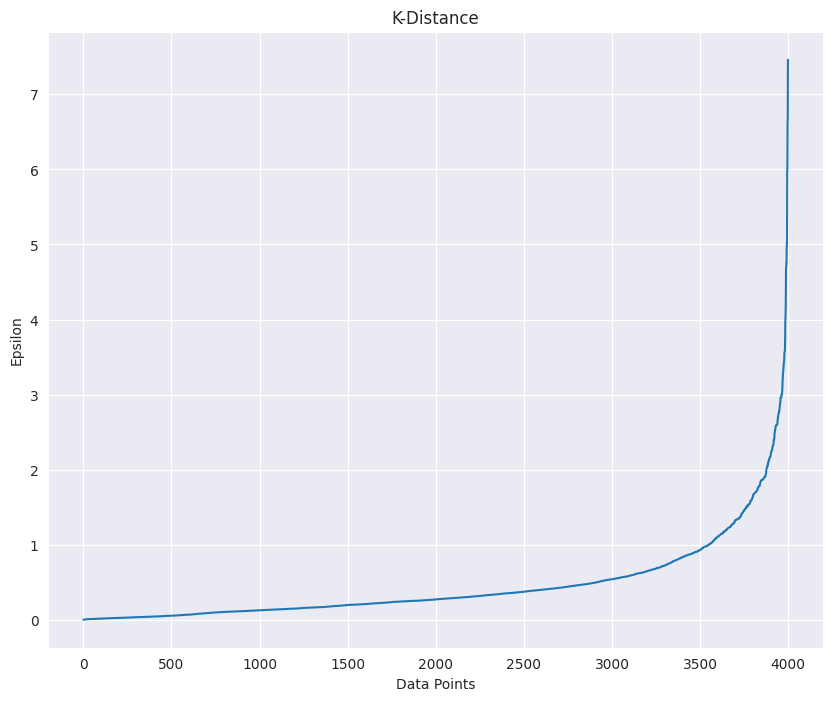

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.title("K-Distance")
plt.xlabel("Data Points")
plt.ylabel("Epsilon")
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 1.6, min_samples = 12)
dbscan.fit(std_df)

DBSCAN(eps=1.6, min_samples=12)

In [ ]:
# Noise samples are given the label -1
d1 = dbscan.labels_
d1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
c1 = pd.DataFrame(d1, columns = ['Cluster'])
c1

,Cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [ ]:
c1.value_counts()

Cluster
 0         2406
 1         1228
-1          350
 2           15
dtype: int64

In [ ]:
df2 = df.copy()
df2 = pd.concat([df, c1], axis = 1)
df2.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0
6,16420.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6942.0,0.0,0.0
7,84914.0,0.0,3.0,1.0,1.0,27482.0,25.0,0.0,0.0,6994.0,0.0,1.0
8,20856.0,0.0,1.0,1.0,1.0,5250.0,4.0,250.0,1.0,6938.0,1.0,-1.0
9,443003.0,0.0,3.0,2.0,1.0,1753.0,43.0,3850.0,12.0,6948.0,1.0,1.0
10,104860.0,0.0,3.0,1.0,1.0,28426.0,28.0,1150.0,3.0,6931.0,1.0,0.0


In [ ]:
sklearn.metrics.silhouette_score(std_df, d1)

0.24862825672365713

In [ ]:
df2.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1.0,79205.800000,115.385507,2.133333,1.005797,1.005797,18033.147826,11.982609,470.765217,1.501449,4697.582609,0.376812
1,0.0,68886.443006,156.971608,1.992067,1.016701,1.013361,16389.539875,11.398330,472.909395,1.373278,3831.379123,0.351983
2,1.0,82455.474201,127.482391,2.182637,1.013104,1.012285,18598.262080,11.968059,439.016380,1.360360,4577.232596,0.405405
3,2.0,51270.400000,326.866667,1.933333,1.000000,1.000000,11593.466667,10.666667,431.000000,1.200000,3466.800000,0.400000


# **Inference**

##### I have applied EDA to analyze the data
#####Applied Standardazation to transform the data
#####I have used three clustering techniques, they are :
#####1) KMeans
#####2) Hierarchical Clusterig
#####3) DBSCAN.
##### By applying different clustering techniques, I discovered that the **KMeans** Clusterig method is appeared to produce better-defined and more distinct clusters compared to Single, Complete, Average linkage and DBSCAN as evidenced by their higher Silhouette scores.